In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_swing = pd.read_csv('./data/2008_swing_states.csv')
#df_swing.head()
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [10]:
df_swing.state.unique()

array(['PA', 'OH', 'FL'], dtype=object)

ECDF - Empirical Cumulative Distribution Function

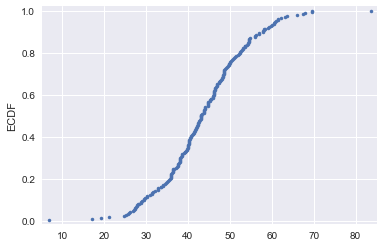

In [7]:
x = np.sort(df_swing.dem_share)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

- x - данные, напр. процент голосующих за демократов, отсортированные по величине
- y - количество данных меньше, чем соотвествующее значение Х

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

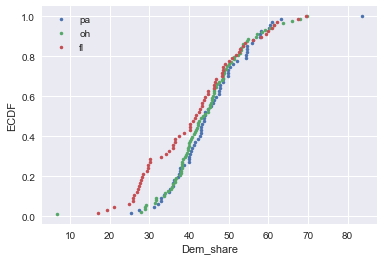

In [20]:
pa = df_swing[df_swing.state == 'PA'].dem_share
oh = df_swing[df_swing.state == 'OH'].dem_share
fl = df_swing[df_swing.state == 'FL'].dem_share

x1, y1 = ecdf(pa)
_ = plt.plot(x1, y1, marker='.', linestyle='none', label='pa')
x2, y2 = ecdf(oh)
_ = plt.plot(x2, y2, marker='.', linestyle='none', label = 'oh')
x3, y3 = ecdf(fl)
_ = plt.plot(x3, y3, marker='.', linestyle='none', label = 'fl')
plt.legend()
plt.ylabel('ECDF')
plt.xlabel('Dem_share')
plt.show()

In [22]:
a = np.random.random(size=10)

PMF- probability mass function - the set of probabilities with descrete outcomes

Discrete Uniform PMF

Binomial distribution - The number r of succeses in n Bernouli trials with probability p of success is Binomially distributed

In [33]:
np.random.binomial(4, 0.5) # кол-во попыток / вероятность успеха / дает кол-во успешных попыток

2

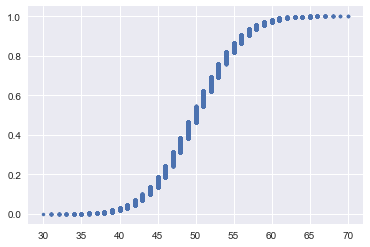

In [35]:
a = np.random.binomial(100, 0.5, size=100000)
x,y = ecdf(a)
plt.plot(x, y, marker='.', linestyle='none')

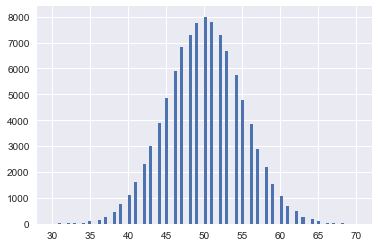

In [39]:
plt.hist(a, bins=100)
plt.show()

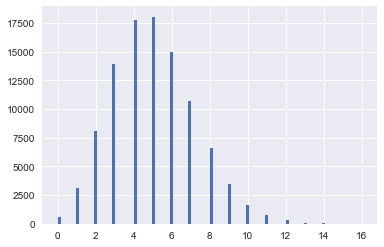

In [44]:
a = np.random.binomial(100, 0.05, size=100000)
plt.hist(a, bins=100)
plt.show()

np.random.poisson(n, size=m) // ожилаемое среднее (mean) / веозвращает массив значений

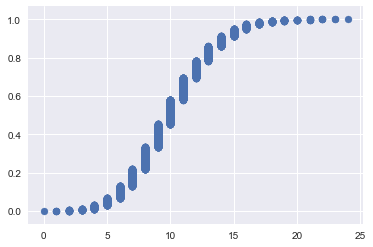

In [5]:
a = np.random.poisson(10, size=10000)
x,y = ecdf(a)
plt.scatter(x,y)

In [8]:
a.mean()

10.0329

In [9]:
a.std()

3.1751878038944406

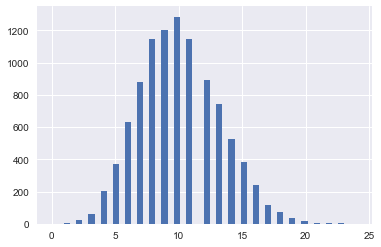

In [11]:
plt.hist(a, bins=50)
plt.show()

- PMF - probability mass function - для дискретных величин
- PDF - probability dencity function - для непрерывных величин

на графиге PDF - площадь ПОД PDF показывает вероятность

In [20]:
print(df_swing.dem_share.mean())
print(df_swing.dem_share.std())
print(df_swing.dem_share.count())

43.76441441441444
10.712770294984137
222


np.random.normal(mean, std, size=size) // отдает массив нормально распределенных значений с заданными mean и std

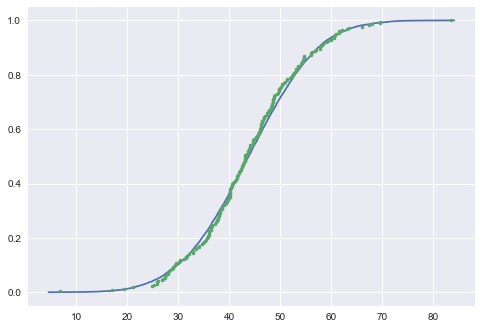

In [30]:
sample = np.random.normal(43.764, 10.712, size = 10000)
x1, y1 = ecdf(sample)
x2, y2 = ecdf(df_swing.dem_share)
sns.set()
plt.plot(x1,y1)
plt.plot(x2, y2, marker='.', linestyle='none')
plt.show()

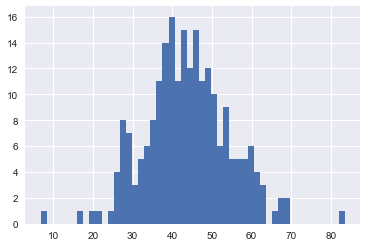

In [19]:
plt.hist(df_swing.dem_share, bins=50)
plt.show()

np.random.exponential(mean, size=size)

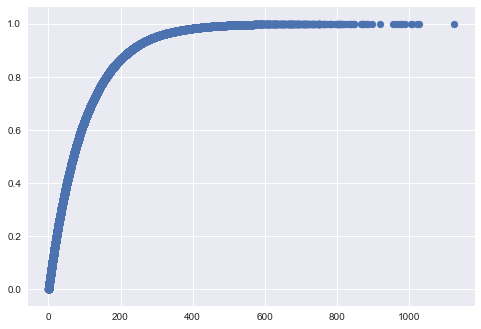

In [32]:
samples = np.random.exponential(100, size=100000)
x,y = ecdf(samples)
sns.set()
plt.scatter(x,y)
plt.show()